In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uncertainties as unc
import uncertainties.unumpy as unp

import seaborn as sns
sns.set(color_codes=True)

from src import shiller

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
loop = 10000
starting_age = 65

yearly_expense=50000.00
starting_assets=500000.00
stock_fraction=0.5
starting_age=23
state_abbrev='IA'
demographic_group='white female'
n_mc=10000

In [48]:
from src import simulation

histories = simulation.run_histories(yearly_expense = yearly_expense, starting_assets=starting_assets, stock_fraction=stock_fraction,
                  starting_age=starting_age, state_abbrev=state_abbrev, demographic_group=demographic_group, n_mc=n_mc)

In [49]:
final_assets = []

for i in range(loop):
    final_assets.append(histories[i][-1])

final_assets = np.array(final_assets)

run_out_of_money_hist = np.array(final_assets < 0.0, dtype=np.float64)
run_out_of_money = unc.ufloat(run_out_of_money_hist.mean(),
                              run_out_of_money_hist.std() / np.sqrt(loop))

print(' Chance of running out of money is {:%}'.format(run_out_of_money))

run_out_of_money

 Chance of running out of money is (69.9+/-0.5)%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


0.699+/-0.004586927075940928

Text(0, 0.5, 'Remaining assets (million USD)')

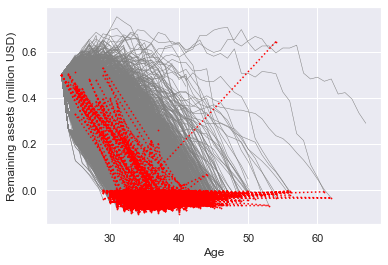

In [50]:
# Plot of asset-over-lifetime histories
plt.figure()

final_ages = []
final_assets = []
for i in range(loop):
    y = histories[i] / 1e6
    x = np.arange(starting_age, starting_age+y.size)
    plt.plot(x, y, color='gray', linewidth=0.5)

    final_assets.append(y[-1])
    final_ages.append(x[-1])

plt.plot(final_ages, final_assets, color='red', ls=':',
         marker='.', markersize=1.5)

plt.xlabel('Age')
plt.ylabel('Remaining assets (million USD)')

In [51]:
final_ages = np.array(final_ages)

max_age = 110
bins = np.linspace(int(starting_age)-0.5, max_age+0.5, max_age-starting_age+2)

In [52]:
final_ages

array([34, 34, 37, ..., 37, 25, 35])

Text(0, 0.5, 'Probability')

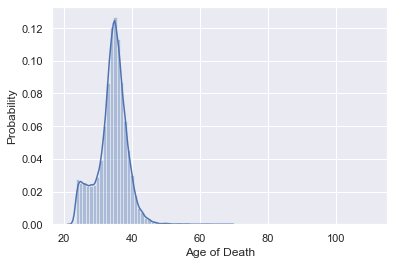

In [53]:
sns.distplot(final_ages, bins=bins)

plt.xlabel('Age of Death')
plt.ylabel('Probability')